In [5]:
%load_ext autoreload
%autoreload 2
import pyvisa
import time
from PyTLPMX import TLPMX
import numpy as np
import numpy.matlib
import clr
from matplotlib import pyplot as plt
from datetime import datetime
from timeit import default_timer as timer
from scipy.optimize import curve_fit
import csv

clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.DeviceManagerCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.GenericPiezoCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.GenericMotorCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.KCube.PositionAlignerCLI.dll")
clr.AddReference("C:\\Program Files\\Thorlabs\\Kinesis\\Thorlabs.MotionControl.KCube.PiezoCLI.dll")

# Import CLIs
from Thorlabs.MotionControl.DeviceManagerCLI import *
from Thorlabs.MotionControl.GenericMotorCLI import *
from Thorlabs.MotionControl.KCube.PositionAlignerCLI import *
from Thorlabs.MotionControl.KCube.PiezoCLI import *
from Thorlabs.MotionControl.GenericPiezoCLI.Piezo import *
from System import Decimal 
from pyximc import *
from HardwareControl import *
from ConnectHardware import *
from Analytics import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[3.84805465 1.5894039  2.75380497 2.01885919 2.8184998  3.24678561
 2.05434583 2.55536084 2.6610687  1.62085895 2.38991012 2.27060665
 2.44558234 3.14756992 3.24886489 2.58155209 2.29049646 2.6848087
 2.37496953 2.97551191]


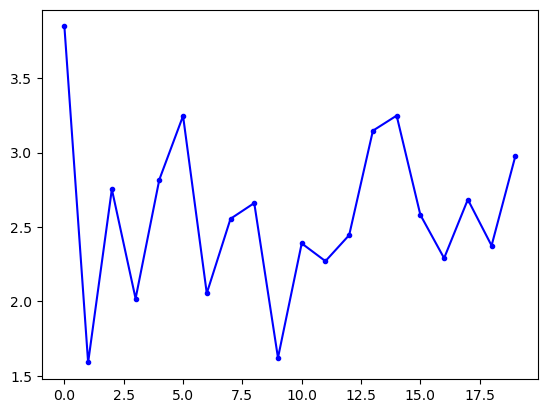

In [12]:
# Example usage:
mean = 2.7
std_dev = 0.7
n = 20
samples = draw_normal_samples(mean, std_dev, n)
print(samples)
plt.plot(samples, "b.-")

In [7]:
kpa = connectKPA()

Connecting to device
Getting device info
KPA101 Position Aligner


In [8]:
kpa.StartPolling(100);
time.sleep(0.5);
kpa.EnableDevice();

In [41]:
# AFTER MIRROR 1
xdiff, ydiff, t_stamps = monitorVoltageDiff(kpa, 600)

Starting 600 seccond measurement....
Done


In [135]:
ydiff_norm = normZScore(ydiff)
xdiff_norm = normZScore(xdiff)

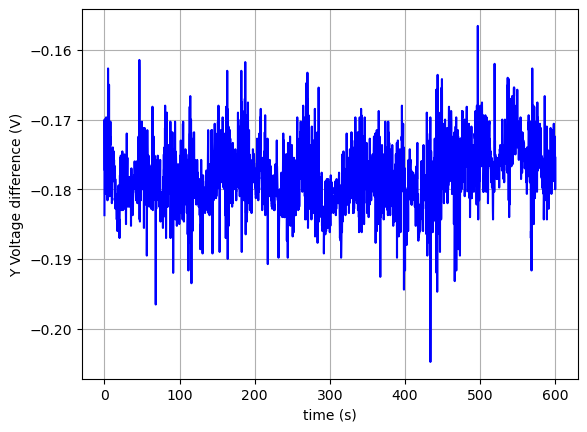

In [42]:
fig, ax = plt.subplots()
ax.plot(t_stamps, ydiff, 'b-')
#ax.plot(t_stamps, xdiff, 'r.')
ax.set_ylabel("Y Voltage difference (V)")
ax.set_xlabel("time (s)")
ax.grid()
#ax.axhline(0, color="red")

In [45]:
np.std(ydiff[0:2700])

0.0037827654763894244

In [ ]:
# MIRROR 3

In [49]:
xdiff, ydiff, t_stamps = monitorVoltageDiff(kpa, 300)

Starting 300 seccond measurement....
Done


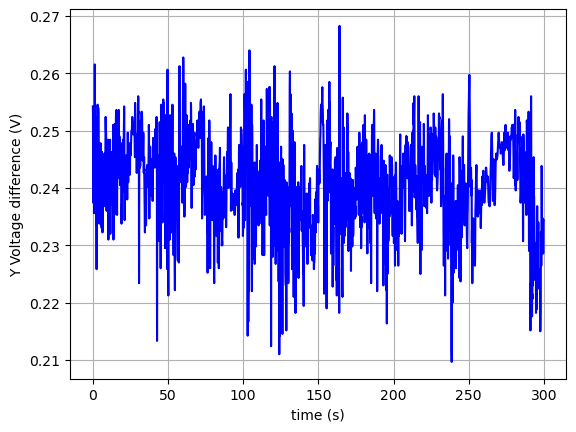

In [50]:
fig, ax = plt.subplots()
ax.plot(t_stamps, ydiff, 'b-')
ax.set_ylabel("Y Voltage difference (V)")
ax.set_xlabel("time (s)")
ax.grid()

In [51]:
np.std(ydiff)

0.007592438673263201

In [ ]:
# MIRROR 3 after adjustment

In [56]:
xdiff, ydiff, t_stamps = monitorVoltageDiff(kpa, 150)

Starting 150 seccond measurement....
Done


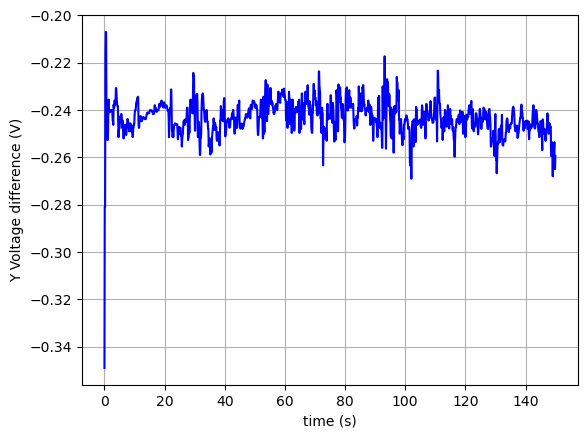

In [57]:
fig, ax = plt.subplots()
ax.plot(t_stamps, ydiff, 'b-')
ax.set_ylabel("Y Voltage difference (V)")
ax.set_xlabel("time (s)")
ax.grid()

In [60]:
np.std(ydiff)

0.006731186504779255

In [15]:
xdiff, ydiff, t_stamps = monitorVoltageDiff(kpa, 600)
np.std(ydiff)

Starting 600 seccond measurement....
Done


0.01005981601938681

In [ ]:
np.std(ydiff)

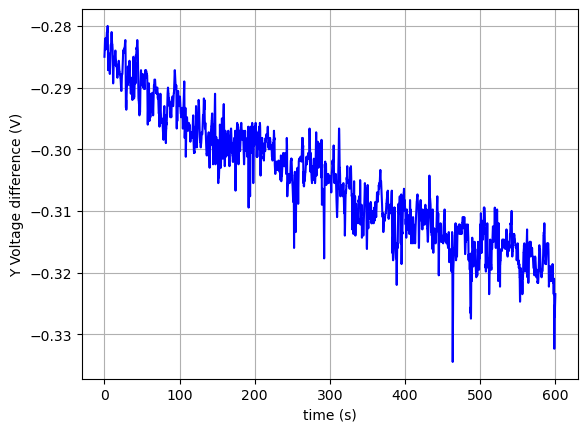

In [16]:
fig, ax = plt.subplots()
ax.plot(t_stamps, ydiff, 'b-')
ax.set_ylabel("Y Voltage difference (V)")
ax.set_xlabel("time (s)")
ax.grid()

In [9]:
xdiff, ydiff, t_stamps = monitorVoltageDiff(kpa, 60)

Starting 60 seccond measurement....


KeyboardInterrupt: 

In [54]:
t_stamps[552] = 60.1

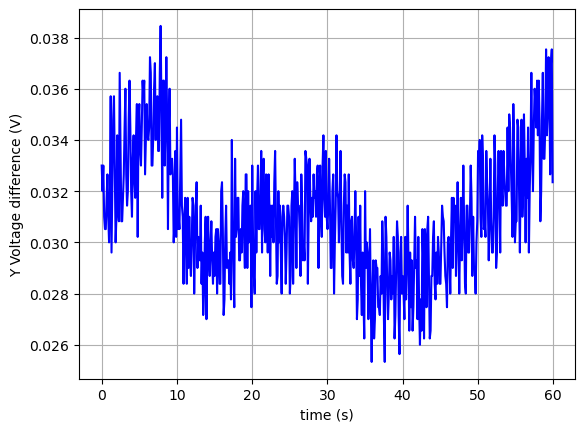

In [72]:
fig, ax = plt.subplots()
ax.plot(t_stamps, ydiff, 'b-')
#ax.plot(t_stamps2, ydiff2, 'r-')
ax.set_ylabel("Y Voltage difference (V)")
ax.set_xlabel("time (s)")
ax.grid()

In [ ]:
np.std(ydiff)

In [10]:
kpa.StopPolling()
kpa.Disconnect()

In [ ]:
# connect to lock-in amps
rm = pyvisa.ResourceManager()
amp1 = rm.open_resource('GPIB0::8::INSTR')
amp2 = rm.open_resource('GPIB0::9::INSTR')
print(rm.list_resources())

('ASRL3::INSTR', 'ASRL4::INSTR', 'GPIB0::8::INSTR', 'GPIB0::9::INSTR')


In [3]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import ipywidgets as widgets


# Replace 'USB::0x1234::5678::INSTR' with the correct resource string for your lock-in amplifier
lockin = amp1

# Function to get voltage measurement from the lock-in amplifier
def get_voltage():
    # Replace 'VOLT?' with the correct command to query the voltage from your lock-in amplifier
    return float(lockin.query("OUTP? 1"))

# Plot settings
plt.ion()
fig, ax = plt.subplots(figsize=(10,5))
line, = ax.plot([], [], 'r-')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Voltage (V)')
ax.set_title('Real-time Voltage Measurements')
xdata, ydata = [], []

# Data acquisition loop
start_time = time.time()
try:
    while True:
        current_time = time.time() - start_time
        voltage = get_voltage()
        
        xdata.append(current_time)
        ydata.append(voltage)
        
        line.set_xdata(xdata)
        line.set_ydata(ydata)
        ax.relim()
        ax.autoscale_view()
        
        clear_output(wait=True)
        display(fig)
        
        plt.pause(0.1)  # Pause to control the update rate (e.g., 0.1 seconds)
except KeyboardInterrupt:
    print("Data acquisition stopped by user.")


# Turn off interactive plotting
plt.ioff()
plt.show()

Data acquisition stopped by user.


In [4]:
rm.close()